In [16]:
import pandas as pd
import sklearn
dataPath = "../Data/"

In [17]:
matches = pd.read_csv("../Data/matches.csv")
odds = pd.read_csv("../Data/odds.csv")

In [18]:
# result code:
# 1: draw

draws = matches[matches['result'] == 1]
draws.head()

,match_id,date,home_team,away_team,result
5,EPL2425_006,2024-08-10,Everton,West Ham,1
12,EPL2425_013,2024-08-17,Crystal Palace,Burnley,1
14,EPL2425_015,2024-08-17,Man United,Aston Villa,1
16,EPL2425_017,2024-08-17,Nottingham Forest,Bournemouth,1
18,EPL2425_019,2024-08-17,West Ham,Tottenham,1


In [28]:
home_team_counts = draws['home_team'].value_counts()
away_team_counts = draws['away_team'].value_counts()



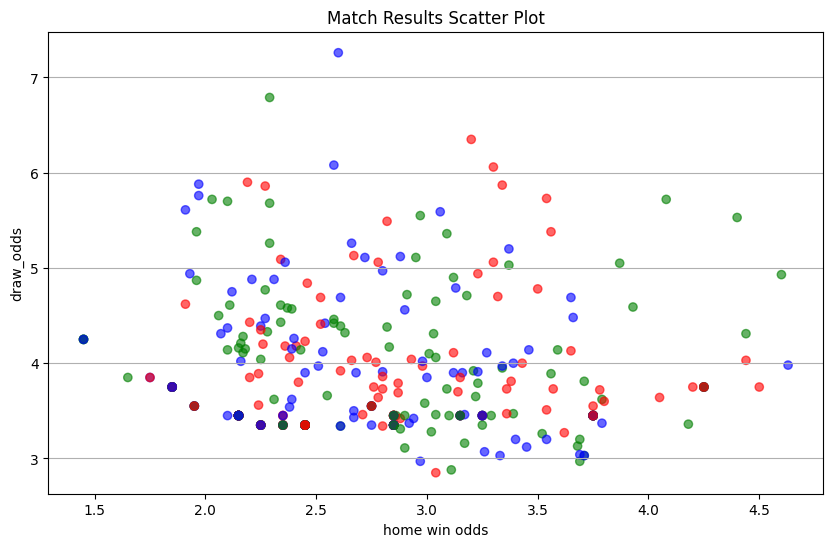

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Create a color map based on the result
color_map = {0: 'green', 1: 'blue', 2: 'red'}
colors = matches['result'].map(color_map)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(odds['home_win_odds'], odds['draw_odds'], c=colors, alpha=0.6)

ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.grid(True, which='major')

plt.xlabel('home win odds')
plt.ylabel('draw_odds')
plt.title('Match Results Scatter Plot')
plt.show()

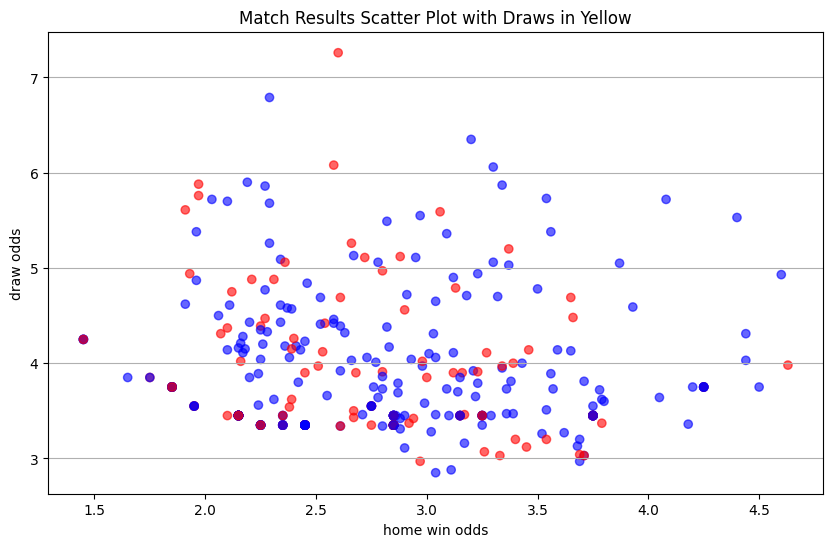

In [21]:
# Create a color map for the scatter plot
color_map = {1: 'red', 0: 'blue', 2: 'blue'}
colors = matches['result'].map(color_map)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(odds['home_win_odds'], odds['draw_odds'], c=colors, alpha=0.6)

ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.grid(True, which='major')

plt.xlabel('home win odds')
plt.ylabel('draw odds')
plt.title('Draw-odds vs home-odds')
plt.show()


In [27]:
# Create the scatter plot with away win odds
plt.figure(figsize=(10, 6))
plt.scatter(df['away_win_odds'], df['draw_odds'], c=colors, alpha=0.6)
plt.xlabel('Away Win Odds')
plt.ylabel('Draw Odds')
plt.title('Scatter Plot of Away Win Odds vs Draw Odds')
plt.show()

KeyError: 'away_win_odds'

<Figure size 1000x600 with 0 Axes>

In [22]:
# Get the matches that resulted in a tie or a home-win

# Filter for draws (result == 1) and home-wins (result == 0)

df = matches[(matches['result'] == 1) | (matches['result'] == 0)]
df.head()

,match_id,date,home_team,away_team,result
0,EPL2425_001,2024-08-10,Arsenal,Newcastle,0
1,EPL2425_002,2024-08-10,Aston Villa,Brighton,0
4,EPL2425_005,2024-08-10,Chelsea,Crystal Palace,0
5,EPL2425_006,2024-08-10,Everton,West Ham,1
6,EPL2425_007,2024-08-10,Liverpool,Brentford,0


In [23]:
# Merge the draws_and_home_wins dataframe with the odds dataframe on match_id
df = df.merge(odds[['match_id', 'draw_odds']], on='match_id', how='left')
df = df.merge(odds[['match_id', 'home_win_odds']], on='match_id', how='left')

In [24]:
df.head()

,match_id,date,home_team,away_team,result,draw_odds,home_win_odds
0,EPL2425_001,2024-08-10,Arsenal,Newcastle,0,4.93,4.60
1,EPL2425_002,2024-08-10,Aston Villa,Brighton,0,5.36,3.09
2,EPL2425_005,2024-08-10,Chelsea,Crystal Palace,0,3.36,4.18
3,EPL2425_006,2024-08-10,Everton,West Ham,1,3.50,2.67
4,EPL2425_007,2024-08-10,Liverpool,Brentford,0,3.92,3.21


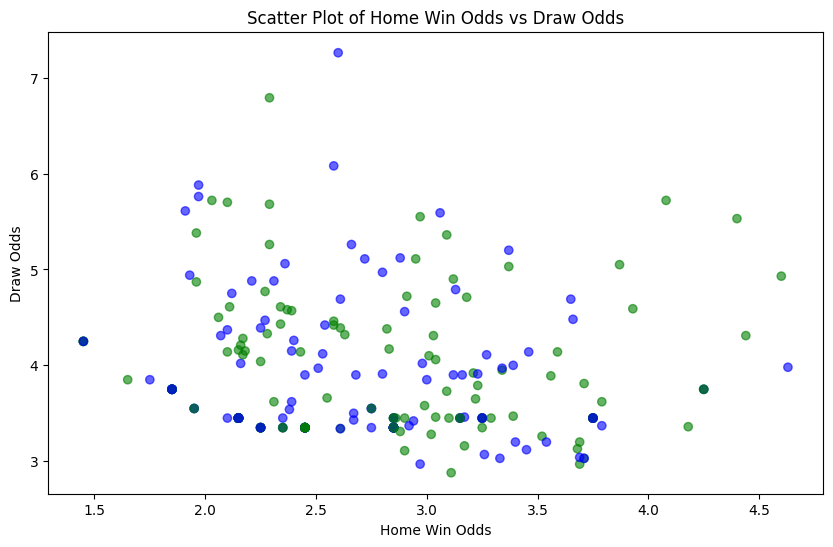

In [25]:
import matplotlib.pyplot as plt

# Create a color map based on the result
color_map = {0: 'green', 1: 'blue'}
colors = df['result'].map(color_map)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['home_win_odds'], df['draw_odds'], c=colors, alpha=0.6)
plt.xlabel('Home Win Odds')
plt.ylabel('Draw Odds')
plt.title('Scatter Plot of Home Win Odds vs Draw Odds')
plt.show()

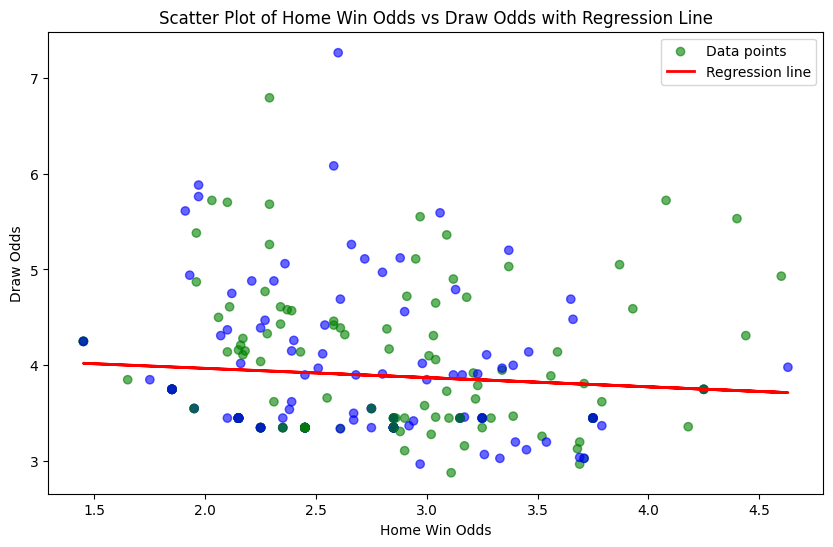

Coefficient: -0.09627986407065003
Intercept: 4.16089105445889


In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df[['home_win_odds']].values.reshape(-1, 1)
y = df['draw_odds'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict the draw odds
y_pred = model.predict(X)

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['home_win_odds'], df['draw_odds'], c=colors, alpha=0.6, label='Data points')
plt.plot(df['home_win_odds'], y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Home Win Odds')
plt.ylabel('Draw Odds')
plt.title('Scatter Plot of Home Win Odds vs Draw Odds with Regression Line')
plt.legend()
plt.show()

# Print the coefficients
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')